# Análisis de Datos con Naïve Bayes
Este notebook incluye procesamiento de datos, análisis exploratorio, análisis estadístico, entrenamiento del modelo Naïve Bayes, y evaluación de resultados.

## Procesamiento de Datos
En esta sección cargamos y preparamos los datos para el análisis.

In [1]:
import pandas as pd
import numpy as np

# Cargar dataset
df = pd.read_csv('/content/movie_success_rate.csv')

# Seleccionar columnas de interés
df = df[['Votes', 'Revenue (Millions)', 'Runtime (Minutes)', 'Rating', 'Metascore', 'Success']]

# Eliminar valores nulos
df.dropna(inplace=True)

# Codificar variable objetivo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Success'] = le.fit_transform(df['Success'])

df.head()

,Votes,Revenue (Millions),Runtime (Minutes),Rating,Metascore,Success
0,757074.0,333.13,121.0,8.1,76.0,1
1,485820.0,126.46,124.0,7.0,65.0,1
2,157606.0,138.12,117.0,7.3,62.0,0
3,60545.0,270.32,108.0,7.2,59.0,0
4,393727.0,325.02,123.0,6.2,40.0,0


## Análisis Exploratorio de Datos (EDA)
Visualización de las relaciones entre variables para detectar patrones.

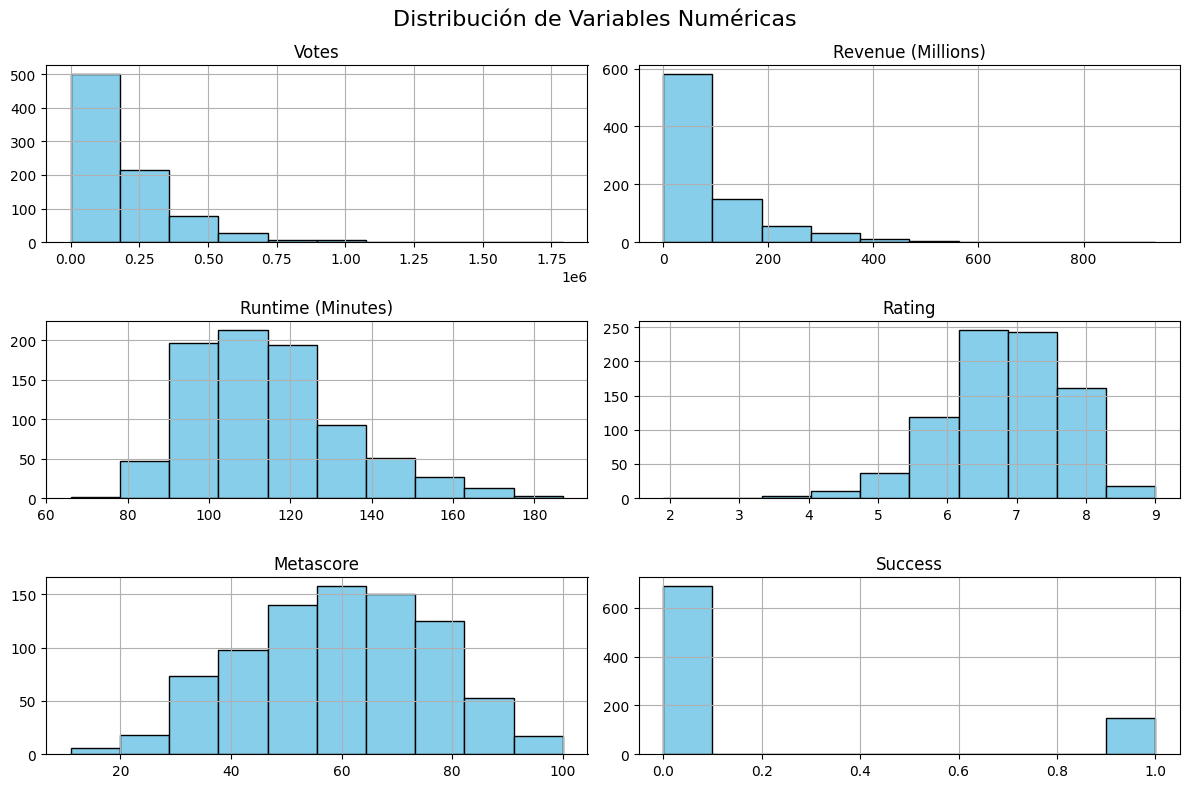

In [13]:
df.hist(figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

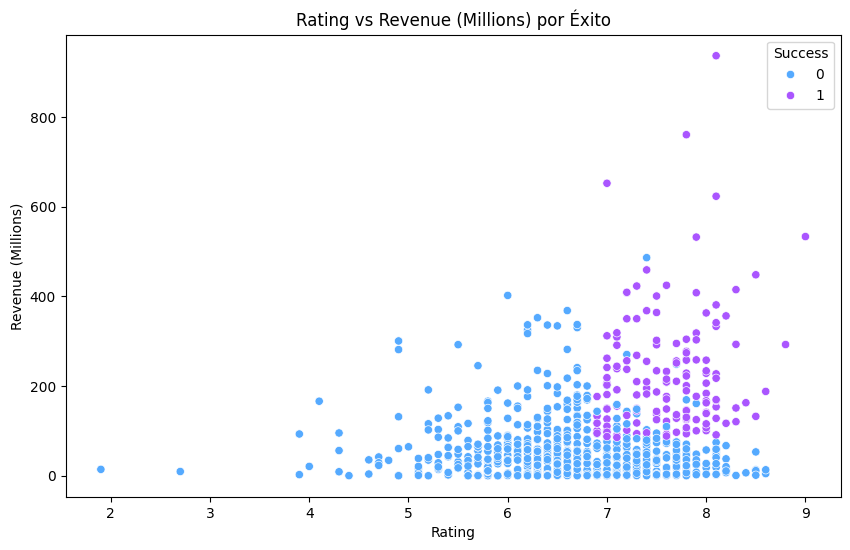

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Rating', y='Revenue (Millions)', hue='Success', palette='cool')
plt.title('Rating vs Revenue (Millions) por Éxito')
plt.show()

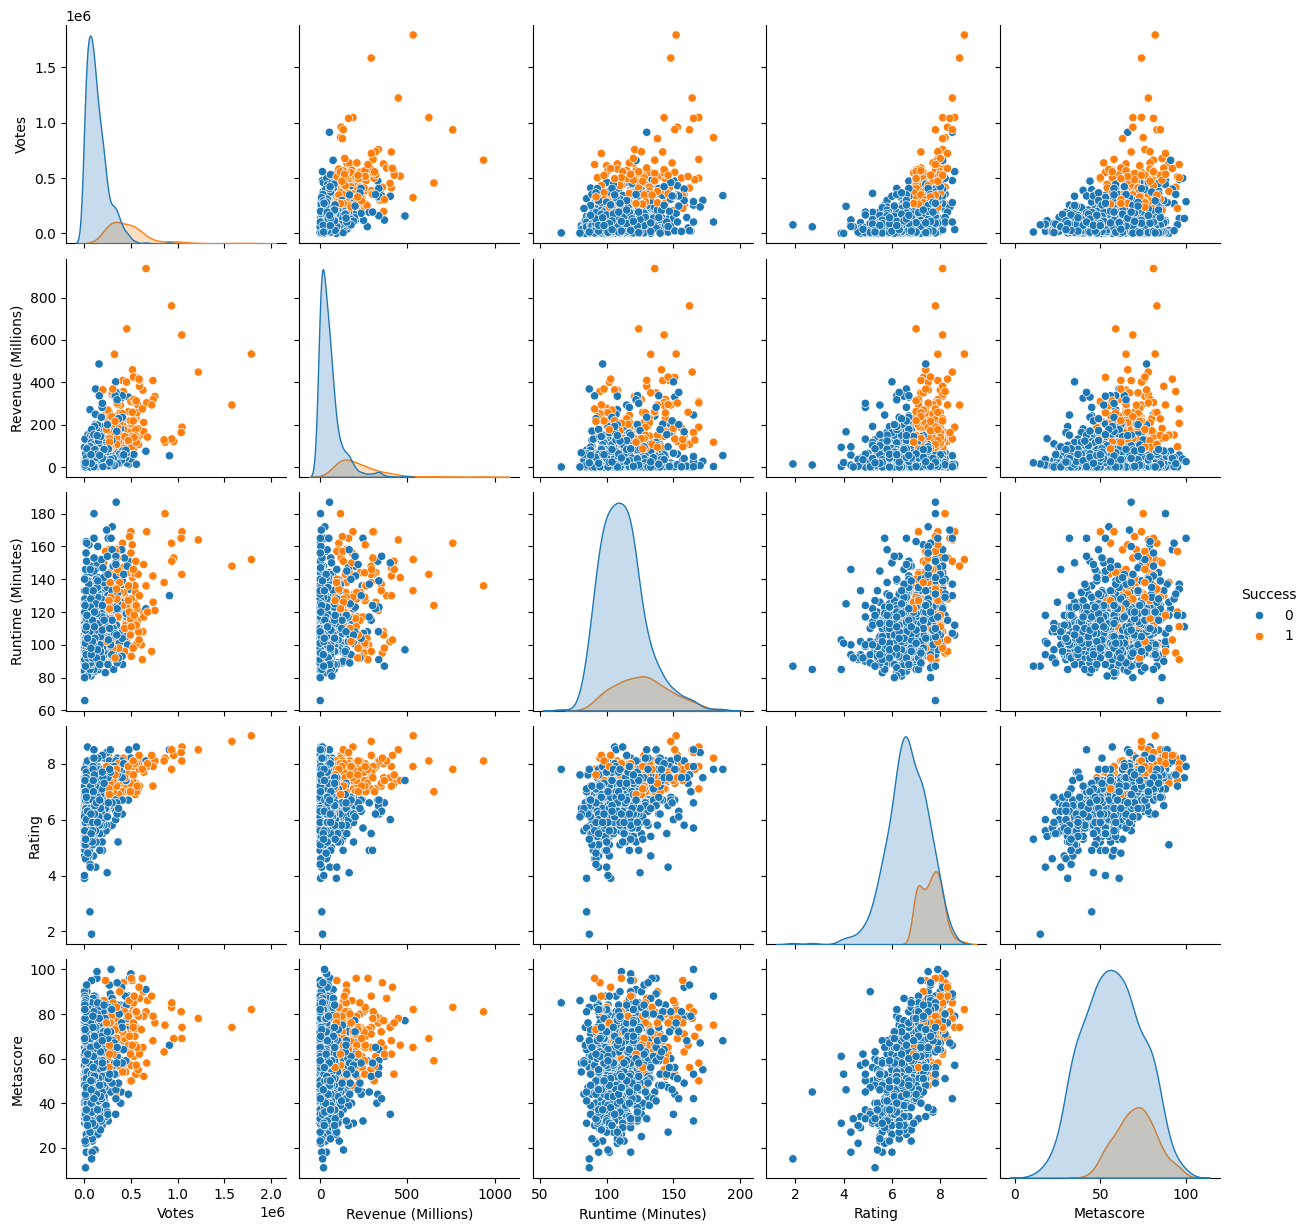

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, hue='Success')
plt.show()

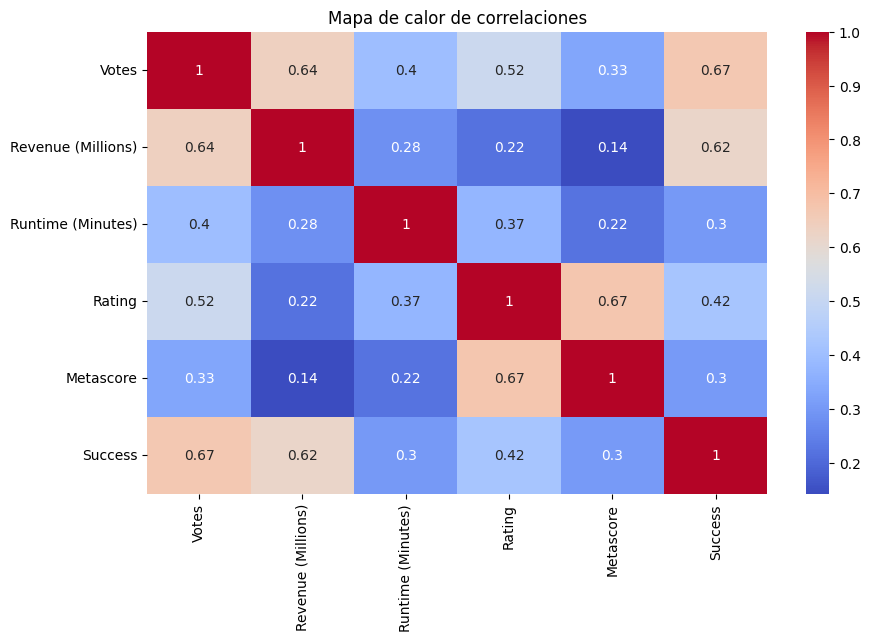

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()

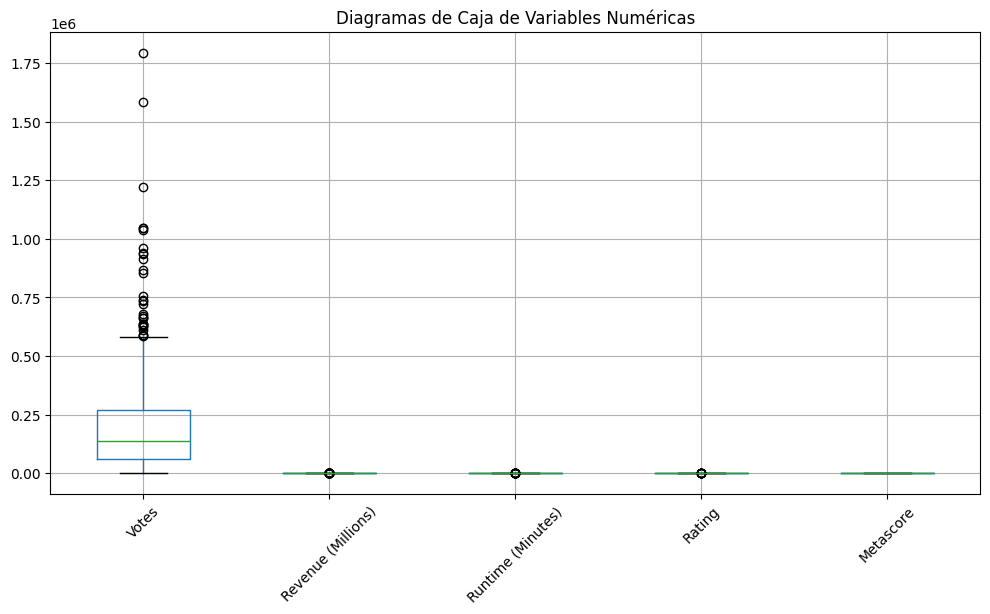

In [6]:
plt.figure(figsize=(12, 6))
df.boxplot(column=['Votes', 'Revenue (Millions)', 'Runtime (Minutes)', 'Rating', 'Metascore'])
plt.title('Diagramas de Caja de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

## Análisis de Datos
Revisión estadística de las variables e identificación de posibles insights.

In [7]:
df.describe()

,Votes,Revenue (Millions),Runtime (Minutes),Rating,Metascore,Success
count,8.380000e+02,838.000000,838.000000,838.000000,838.000000,838.000000
mean,1.932303e+05,84.564558,114.638425,6.814320,59.575179,0.177804
std,1.930990e+05,104.520227,18.470922,0.877754,16.952416,0.382576
min,1.780000e+02,0.000000,66.000000,1.900000,11.000000,0.000000
25%,6.127650e+04,13.967500,101.000000,6.300000,47.000000,0.000000
50%,1.368795e+05,48.150000,112.000000,6.900000,60.000000,0.000000
75%,2.710830e+05,116.800000,124.000000,7.500000,72.000000,0.000000
max,1.791916e+06,936.630000,187.000000,9.000000,100.000000,1.000000


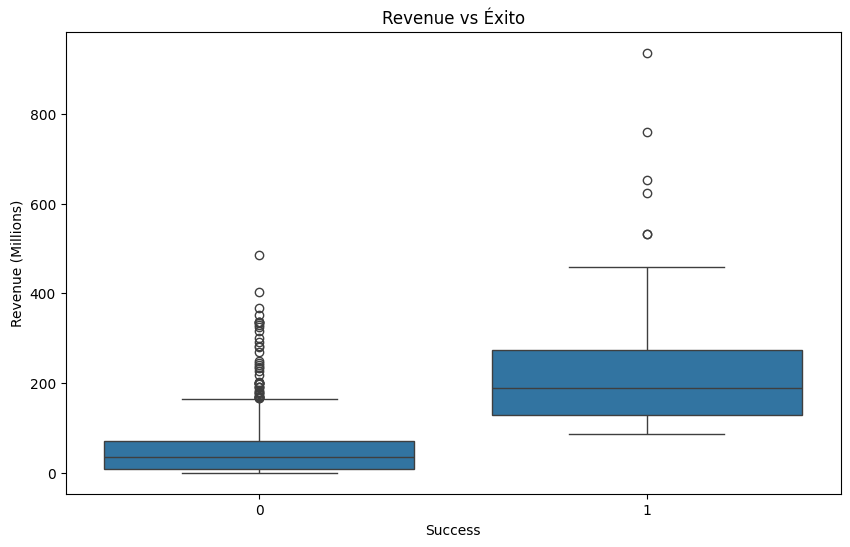

In [8]:
# Boxplot por categoría de éxito
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Success', y='Revenue (Millions)')
plt.title('Revenue vs Éxito')
plt.show()

## Entrenamiento y Pruebas del Modelo
Dividimos los datos y entrenamos el modelo Naïve Bayes.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df.drop('Success', axis=1)
y = df['Success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

## Predicciones y Evaluación del Modelo
Calculamos métricas para evaluar el desempeño del modelo.

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8690476190476191
Precision: 0.6666666666666666
Recall: 0.7428571428571429
Matriz de Confusión:
 [[120  13]
 [  9  26]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       133
           1       0.67      0.74      0.70        35

    accuracy                           0.87       168
   macro avg       0.80      0.82      0.81       168
weighted avg       0.88      0.87      0.87       168



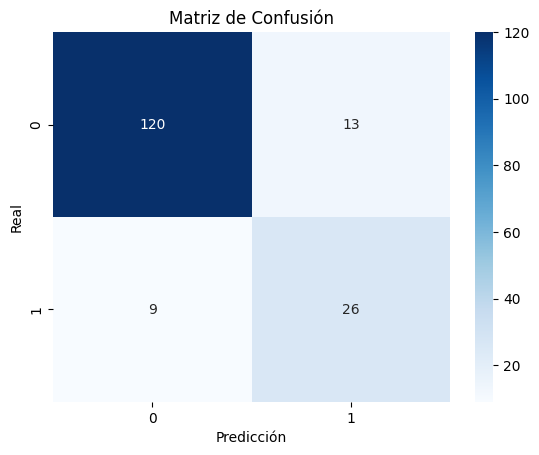

In [11]:
# Visualización de la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

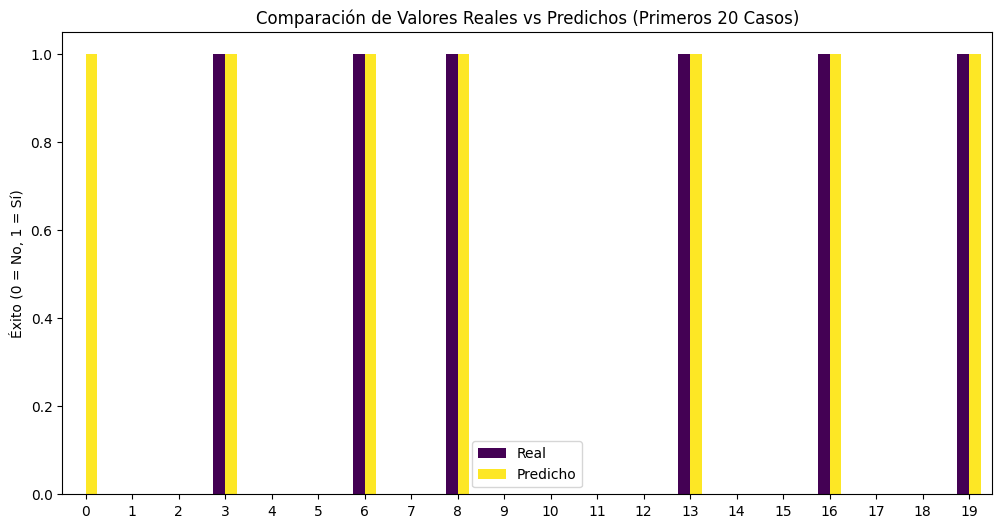

In [12]:
# Comparación real vs predicho
comparison_df = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
comparison_df.reset_index(drop=True).head(20).plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.title('Comparación de Valores Reales vs Predichos (Primeros 20 Casos)')
plt.ylabel('Éxito (0 = No, 1 = Sí)')
plt.xticks(rotation=0)
plt.show()